In [1]:
!date

Mon Jun 23 12:03:10 PM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ants
from tqdm import tqdm
import warnings

In [4]:
import ants

In [5]:
from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel

In [6]:
def run_contrast(func_imgs,
                 events_tsv,
                 confounds_tsv,
                 contrast_vec,
                 ofn):
    
    first_level_model = FirstLevelModel(
    t_r=1.5,                   # replace with your TR
    slice_time_ref=0.5,        # reference slice (0–1)
    hrf_model='spm',           # canonical SPM HRF
    drift_model='cosine',
    high_pass=0.01,            # cutoff (Hz)
    noise_model='ar1',
    smoothing_fwhm=6.0,        # in mm
    signal_scaling=False,
    standardize=True,
    verbose=1)
    
    first_level_model = first_level_model.fit(
    run_imgs=func_imgs,
    events=events_tsv,
    confounds=None)
    
    dm = first_level_model.design_matrices_[0]
    print(dm.columns) 
    
    z_map = first_level_model.compute_contrast(contrast_vec,stat_type='t',output_type='stat')
    
    
    display = plotting.plot_stat_map(
    z_map,
    threshold=3.1,
    display_mode='ortho',
    cut_coords=None, #(0, -52, 8),
    title=ofn.split('/')[-1])
    plotting.show()
    
    z_map.to_filename(ofn)

In [7]:
indir = '../Data/things/fmriprep2'

In [8]:
deepcor_dir = '../Data/things/deepcor_outputs/'
analysis_name = 'DeepCor-things-v2'
analysis_dir = os.path.join(deepcor_dir,analysis_name)
analysis_dir

'../Data/things/deepcor_outputs/DeepCor-things-v2'

In [9]:
kinds = ['preproc','compcor','signal']
k = 2
kind = kinds[k]

In [10]:
subs = ['sub-01','sub-02','sub-03']
s = 2
sub = subs[s]
sess_name = 'ses-localizer2' if sub=='sub-01' else 'ses-localizer1'

In [11]:
contrast_vec = np.array([-1,5,-1,-1,-1,-1,0,0,0,0])

In [12]:
# import ants
# import numpy as np
# for s in [0,1,2]:
#     for method in ['preproc','compcor','signal']:
#         kind = 'contrast_face'
#         fn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_R{r}.nii.gz'
#         ofn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_Ravg.nii.gz'
#         ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [1,2,3,4,5,6]]
#         avg = np.array([im.numpy() for im in ims]).mean(axis=0)
#         ims[0].new_image_like(avg).to_filename(ofn.format(s=s,method=method,kind=kind))

In [13]:
from matplotlib import pyplot as plt

In [14]:
ffa = ants.image_read('../Misc/ffa_map_resampled.nii')

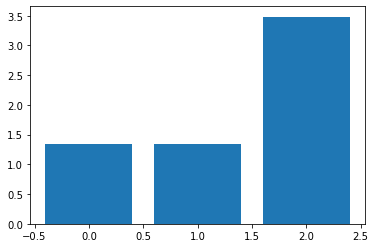

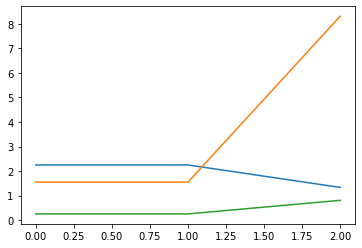

In [15]:
avgs = []
for sub in ['sub-01','sub-02','sub-03']:
    im1=ants.image_read(f'../Data/things/GLM/{sub}-preproc-face.nii')
    im2=ants.image_read(f'../Data/things/GLM/{sub}-compcor-face.nii')
    im3=ants.image_read(f'../Data/things/GLM/{sub}-signal-face.nii')

    ffa_mask = ffa.numpy()>=6
    avg = [im1.numpy()[ffa_mask].mean(),im2.numpy()[ffa_mask].mean(),im3.numpy()[ffa_mask].mean()]
    avgs.append(avg)
    
plt.bar([0,1,2],np.array(avgs).mean(axis=0))

plt.figure()
plt.plot(np.array(avgs)[0,:])
plt.plot(np.array(avgs)[1,:])
plt.plot(np.array(avgs)[2,:])

[[0.6007132, 0.4119786, 0.5865089],
 [0.32467952, 0.51551706, 1.4110432],
 [0.24430221, 0.22510152, 0.2608855]]

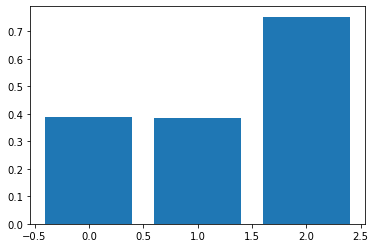

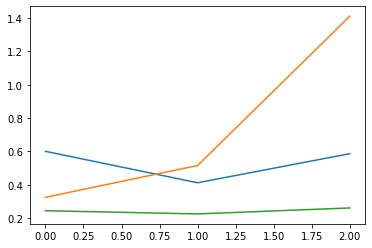

In [16]:
avgs = []
for s in [0,1,2]:
    im1=ants.image_read(f'../Data/things/deepcor_outputs/DeepCor-things-v2/preproc_contrast_face_S{s}_Ravg.nii.gz')
    im2=ants.image_read(f'../Data/things/deepcor_outputs/DeepCor-things-v2/compcor_contrast_face_S{s}_Ravg.nii.gz')
    im3=ants.image_read(f'../Data/things/deepcor_outputs/DeepCor-things-v2/signal_contrast_face_S{s}_Ravg.nii.gz')
    
    ffa_mask = ffa.numpy()>=6
    avg = [im1.numpy()[ffa_mask].mean(),im2.numpy()[ffa_mask].mean(),im3.numpy()[ffa_mask].mean()]
    avgs.append(avg)
    
plt.bar([0,1,2],np.array(avgs).mean(axis=0))

plt.figure()
plt.plot(np.array(avgs)[0,:])
plt.plot(np.array(avgs)[1,:])
plt.plot(np.array(avgs)[2,:])

avgs

In [25]:
m = np.array(avgs).mean(axis=0)

array([0.3898983 , 0.38419905, 0.75281256], dtype=float32)

In [29]:
#m[2]/m[0]*100

In [17]:
ffa = ants.image_read('../Misc/ffa_map_resampled.nii')
ffa_mask = ffa.numpy()>=6

In [18]:
kind = 'contrast_face'

In [19]:
fn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_R{r}.nii.gz'

In [20]:
import ants
import numpy as np
rel_arr=[]
for s in [0,1,2]:
    temp=[]
    for method in ['preproc','compcor','signal']:
        kind = 'contrast_face'
        #kind = 'corr2face'
        fn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_R{r}.nii.gz'
        #ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [1,2,3]]
        
        ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [1,2,3]]
        arr1 = np.array([im.numpy() for im in ims])
        arr1 = arr1.mean(axis=0)
        arr1[ffa_mask==False]=0
        critval=np.sort(arr1.flatten())[-100]
        arr1[arr1<critval]=0

        ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [4,5,6]]
        arr2 = np.array([im.numpy() for im in ims])
        arr2 = arr2.mean(axis=0)

        rel = np.corrcoef(arr1[arr1>0],arr2[arr1>0])[0,1]
        
        temp.append(rel)
    rel_arr.append(temp)

In [21]:
rel_arr

[[0.5661370864668829, 0.5572794806514049, 0.4929648833407064],
 [0.6878759805724379, 0.7113209353793941, 0.4828872251431101],
 [0.5980665903380936, 0.6893249582448547, 0.6283712861942576]]

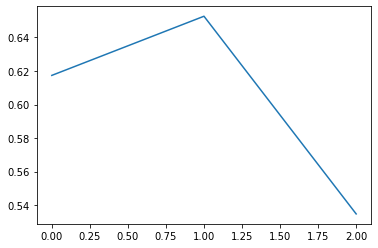

In [22]:
plt.plot(np.array(rel_arr).mean(axis=0))